# How to fill an area

In this example, we show how to fill specified area with a given color.

In [1]:
import openturns as ot

We generate a sample from a standard gaussian distribution.

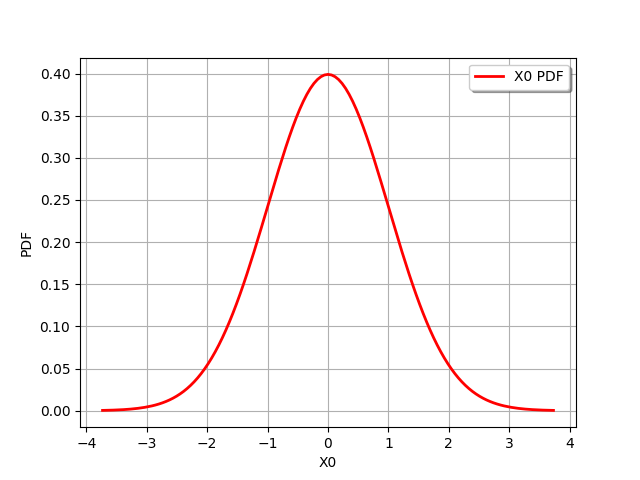

In [2]:
dist = ot.Normal()
dist.drawPDF()

In [3]:
def linearSample(xmin,xmax,npoints):
    '''Returns a sample created from a regular grid 
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

In [4]:
a = 1.
b = 2.

In [5]:
nplot = 100 # Number of points in the plot
x = linearSample(a,b,nplot)
y = dist.computePDF(x)

The following function uses the `PolygonArray` class to create a area filled with a given color.

In [6]:
def drawInTheBounds(vLow,vUp,n_test):
    '''
    Draw the area within the bounds.
    '''
    palette = ot.Drawable.BuildDefaultPalette(2)
    myPaletteColor = palette[1]
    polyData = [[vLow[i], vLow[i+1], vUp[i+1], vUp[i]] for i in range(n_test-1)]
    polygonList = [ot.Polygon(polyData[i], myPaletteColor, myPaletteColor) for i in range(n_test-1)]
    boundsPoly = ot.PolygonArray(polygonList)
    return boundsPoly

Compute the bounds to fill: the lower vertical bound is zero and the upper vertical bound is the PDF.

In [7]:
vLow = [[x[i,0],0.] for i in range(nplot)] 
vUp = [[x[i,0],y[i,0]] for i in range(nplot)]

In [8]:
area = dist.computeCDF(b) - dist.computeCDF(a)

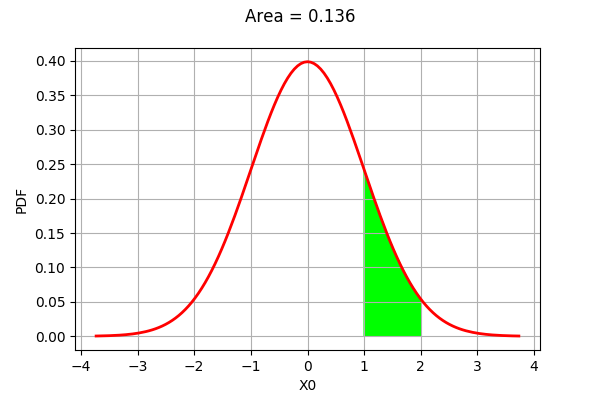

In [9]:
boundsPoly = drawInTheBounds(vLow,vUp,nplot)
graph = dist.drawPDF()
graph.add(boundsPoly)
graph.setTitle("Area = %.3f" % (area))
graph.setLegends([""])
graph

The CDF difference is equal to the area under the curve.